In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [3]:
import tensorflow as tf
import tensorflow.keras
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

In [4]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [6]:
train = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')
val = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [7]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [8]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [9]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [10]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=True)  # randomly flip images


datagen.fit(x_train)

In [11]:
IMAGE_SIZE = 150

def build_vgg16():
  tf.keras.backend.clear_session()
  input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))
    
  x = Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding="same", activation="relu", name="block1_conv1")(input_tensor)
  x = Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding="same", activation="relu", name="block1_conv2")(x)  
  x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="block1_pool")(x) 

  x = Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding="same", activation="relu", name="block2_conv1")(x)
  x = Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding="same", activation="relu", name="block2_conv2")(x)  
  x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="block2_pool")(x) 
    
  x = Conv2D(filters=256, kernel_size=3, strides=(1, 1), padding="same", activation="relu", name="block3_conv1")(x)
  x = Conv2D(filters=256, kernel_size=3, strides=(1, 1), padding="same", activation="relu", name="block3_conv2")(x)  
  x = Conv2D(filters=256, kernel_size=3, strides=(1, 1), padding="same", activation="relu", name="block3_conv3")(x)  
  x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="block3_pool")(x) 

  x = Conv2D(filters=512, kernel_size=3, strides=(1, 1), padding="same", activation="relu", name="block4_conv1")(x)
  x = Conv2D(filters=512, kernel_size=3, strides=(1, 1), padding="same", activation="relu", name="block4_conv2")(x)  
  x = Conv2D(filters=512, kernel_size=3, strides=(1, 1), padding="same", activation="relu", name="block4_conv3")(x)  
  x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="block4_pool")(x) 
    
  x = Conv2D(filters=512, kernel_size=3, strides=(1, 1), padding="same", activation="relu", name="block5_conv1")(x)
  x = Conv2D(filters=512, kernel_size=3, strides=(1, 1), padding="same", activation="relu", name="block5_conv2")(x)  
  x = Conv2D(filters=512, kernel_size=3, strides=(1, 1), padding="same", activation="relu", name="block5_conv3")(x)  
  x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="block5_pool")(x)   # 7*7*512
    

  x = GlobalAveragePooling2D()(x) # 512
  x = Dense(50, activation="relu")(x)
  output = Dense(units=1, activation='sigmoid')(x)


  model = Model(inputs=input_tensor, outputs=output)
  model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'] )
  return model

model = build_vgg16()
model.summary()

2023-01-13 02:39:21.360220: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 02:39:21.465588: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 02:39:21.466604: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 02:39:21.468412: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 1)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [12]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 4, verbose=1,factor=0.3, min_lr=0.0000001)

In [13]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 25 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

2023-01-13 02:39:24.653213: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2023-01-13 02:39:26.615476: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


163/163 [==============================] - 29s 115ms/step - loss: 0.5762 - accuracy: 0.7433 - val_loss: 0.6304 - val_accuracy: 0.5625
Epoch 2/25
163/163 [==============================] - 18s 111ms/step - loss: 0.3887 - accuracy: 0.8194 - val_loss: 1.3724 - val_accuracy: 0.6250
Epoch 3/25
163/163 [==============================] - 18s 113ms/step - loss: 0.3132 - accuracy: 0.8589 - val_loss: 1.2372 - val_accuracy: 0.6875
Epoch 4/25
163/163 [==============================] - 18s 109ms/step - loss: 0.2888 - accuracy: 0.8738 - val_loss: 0.7987 - val_accuracy: 0.7500
Epoch 5/25
163/163 [==============================] - 18s 110ms/step - loss: 0.2909 - accuracy: 0.8679 - val_loss: 1.0504 - val_accuracy: 0.6250
Epoch 6/25
163/163 [==============================] - 18s 109ms/step - loss: 0.2582 - accuracy: 0.8880 - val_loss: 1.1719 - val_accuracy: 0.5625
Epoch 7/25
163/163 [==============================] - 19s 114ms/step - loss: 0.2560 - accuracy: 0.8855 - val_loss: 0.6994 - val_accuracy: 0.7

In [14]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 1s 35ms/step - loss: 0.2997 - accuracy: 0.9119
Loss of the model is -  0.2997097671031952
20/20 [==============================] - 1s 33ms/step - loss: 0.2997 - accuracy: 0.9119
Accuracy of the model is -  91.18589758872986 %


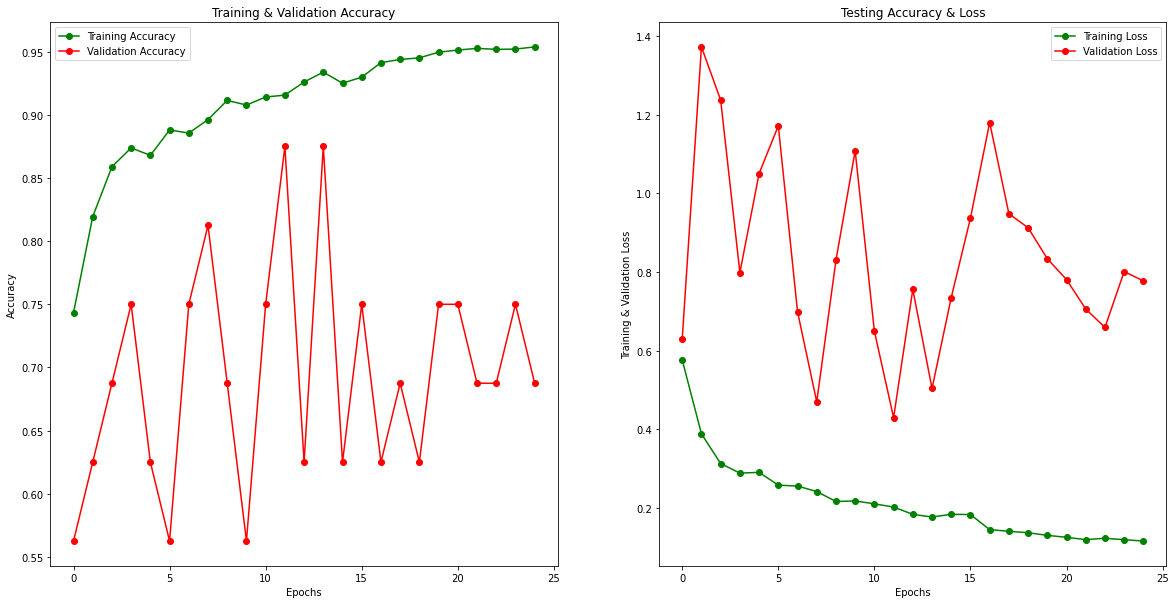

In [15]:
epochs = [i for i in range(25)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()